In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from probml_utils import latexify, savefig

In [2]:
import pandas as pd

In [3]:
mlp = pd.read_csv('mlp/testing_predictions.csv')
gmlp = pd.read_csv('gmlp/testing_predictions.csv')

In [4]:
gmlp

,Timestamp,Ground Truth,mean,sigma,MC_Mean,MC_Sigma,de_Mean,de_Sigma,bs_Mean,bs_Sigma
0,2011-04-21 00:00:00-04:00,0.1250,0.560691,0.455069,0.304496,0.463558,0.488107,0.389192,-1.572591,6.280275
1,2011-04-21 00:01:00-04:00,0.1250,0.540723,0.452637,0.041602,0.374473,0.481756,0.388740,-1.620432,6.272551
2,2011-04-21 00:02:00-04:00,0.1250,0.589463,0.453883,-0.036667,0.426977,0.485934,0.388017,-1.552208,6.268858
3,2011-04-21 00:03:00-04:00,0.0625,0.619394,0.454820,-0.058678,0.320103,0.476148,0.388557,-1.578233,6.271600
4,2011-04-21 00:04:00-04:00,0.1250,0.582698,0.451035,-0.028519,0.358891,0.473976,0.389868,-1.594788,6.275545
...,...,...,...,...,...,...,...,...,...,...
15651,2011-05-01 23:00:00-04:00,0.0000,0.257425,0.477459,-0.201398,0.422441,0.245507,0.423984,-1.776733,6.685898
15652,2011-05-01 23:01:00-04:00,0.0000,0.232105,0.475600,-0.161404,0.385399,0.230458,0.420967,-1.857508,6.699568
15653,2011-05-01 23:02:00-04:00,0.0625,0.194375,0.475994,-0.104502,0.481986,0.214617,0.419119,-1.802611,6.714696
15654,2011-05-01 23:03:00-04:00,0.1250,0.224032,0.474981,-0.118514,0.447761,0.196403,0.412692,-1.949037,6.701703


In [5]:
os.chdir('../../../')
from utilities import errors

In [6]:
e1=errors.mae(mlp['Ground Truth'].values,mlp['mean'].values)
e2=errors.mae(gmlp['Ground Truth'].values,gmlp['MC_Mean'].values)

In [7]:
timestamp = pd.to_datetime(mlp['Timestamp']).dt.strftime('%Y-%m-%d')

In [8]:
timestamp

0        2011-04-21
1        2011-04-21
2        2011-04-21
3        2011-04-21
4        2011-04-21
            ...    
15651    2011-05-01
15652    2011-05-01
15653    2011-05-01
15654    2011-05-01
15655    2011-05-01
Name: Timestamp, Length: 15656, dtype: object

In [9]:
mlp['Ground Truth']

0        0.1250
1        0.1250
2        0.1250
3        0.0625
4        0.1250
          ...  
15651    0.0000
15652    0.0000
15653    0.0625
15654    0.1250
15655    0.1000
Name: Ground Truth, Length: 15656, dtype: float64

In [10]:
import jax.numpy as jnp
import os
os.environ['LATEXIFY']='1'

In [11]:
os.listdir()

['.git',
 '.gitignore',
 'Architectures.md',
 'datasets',
 'FIGURES',
 'models',
 'notebooks',
 'README.md',
 'utilities']

In [12]:
os.environ['FIG_DIR']='FIGURES/'

In [13]:
latexify(fig_width=7/2)

/tmp/ipykernel_1041/878857877.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=1)
/home/rohit_khoiwal/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=pad_inches)


saving image to FIGURES/comparison_dishwasher_latexified.pdf
Figure size: [3.5 1.5]


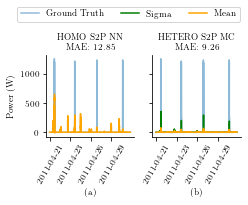

In [17]:
fig,(a,b)=plt.subplots(1,2, sharey=True)
a.plot(mlp['Ground Truth'],label='y', alpha=0.5)
a.plot(mlp['mean'],label='$\hat{y}$',color='orange')
b.plot(gmlp['Ground Truth'],label='Ground Truth', alpha=0.5)

b.plot(gmlp['MC_Sigma'],color='green',label='Sigma')
b.plot(gmlp['MC_Mean'],color='orange',label='Mean')
lgd = b.legend(bbox_to_anchor=(1.04,1.65),ncol=3)
a.set_title(f'HOMO S2P NN\nMAE: {e1:.2f}')
b.set_title(f'HETERO S2P MC\nMAE: {e2:.2f}')

a.set_xticks(jnp.arange(0, len(timestamp), 4000), labels=timestamp.values[::4000])
b.set_xticks(jnp.arange(0, len(timestamp), 4000), labels=timestamp.values[::4000])
a.tick_params(axis='x',rotation=60)
b.tick_params(axis='x',rotation=60)
# a.set_ylim([0,1250])
# b.set_ylim([0,1250])
a.set_xlabel('(a)')
b.set_xlabel('(b)')
a.set_ylabel('Power (W)')
sns.despine()
plt.tight_layout(pad=1)
savefig('comparison_dishwasher',bbox_extra_artists=(lgd,),bbox_inches='tight')

In [15]:
timestamp

0        2011-04-21
1        2011-04-21
2        2011-04-21
3        2011-04-21
4        2011-04-21
            ...    
15651    2011-05-01
15652    2011-05-01
15653    2011-05-01
15654    2011-05-01
15655    2011-05-01
Name: Timestamp, Length: 15656, dtype: object